In [10]:

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt




In [11]:
heuristics = ["h0","h1", "h2", "h3", "h4", "h5", "h6"]

In [12]:


def plotGraph(heuristics, df_dict_list, metrics, metric_names):
    
    # df_dict_list is a list which contains the dictionaries with key: title and 
    # value: df which has mean of column of metrics across all output files for h0 and pairs of heuristics and a particular year (input file)
    
    for i in range(len(metrics)):
        
        j, k = 0, 0
        plots_per_row = 3
        fig, axs = plt.subplots(int((len(heuristics)-1)/plots_per_row), plots_per_row, figsize=(18, 11))
        
        key0_1 = list(df_dict_list[0].keys())
        key0_2 = list(df_dict_list[1].keys())
        
        y_val = []
                
        for l in range(len(heuristics)-1):
            
            # get x and y values
            x1 = df_dict_list[0][key0_1[0]][["prop_graph"]]
            x2 = df_dict_list[0][key0_1[i+1]][["prop_graph"]]
            x3 = df_dict_list[1][key0_2[0]][["prop_graph"]]
            x4 = df_dict_list[1][key0_2[i+1]][["prop_graph"]]
            
            y1 = df_dict_list[0][key0_1[0]][[metrics[i]]]
            y2 = df_dict_list[0][key0_1[l+1]][[metrics[i]]]
            y3 = df_dict_list[1][key0_2[0]][[metrics[i]]]
            y4 = df_dict_list[1][key0_2[l+1]][[metrics[i]]]

                                                      
            # plot h0 of year 2012
            axs[j, k].plot(x1, y1, '-ok', label=key0_1[0], color = '#104E8B')
            
            # plot h0_h pair of year 2012
            axs[j, k].plot(x2, y2, '-ok', label=key0_1[l+1], color = '#00BFFF')

            # plot h0 of year 2014
            axs[j, k].plot(x3, y3, '-ok', label=key0_2[0], color = '#8B475D')
            
            # plot h0_h pair of year 2014
            axs[j, k].plot(x4, y4, '-ok', label=key0_2[l+1], color = '#DB7093')
            
            # get max and min y values to set y-limits of the plot
            y_val.append(np.min(y1))
            y_val.append(np.max(y1))
            y_val.append(np.min(y2))
            y_val.append(np.max(y2))
            y_val.append(np.min(y3))
            y_val.append(np.max(y3))
            y_val.append(np.min(y4))
            y_val.append(np.max(y4))
            
            axs[j, k].set_ylim([np.min(y_val), np.max(y_val)+0.1])
            
            if metric_names[i] == 'Number of Cluster':
                axs[j, k].set_yscale('log')
                
            axs[j, k].legend()
            
            for ax in axs.flat: 
                #ax.set(xlabel='p', ylabel=metric_names[i])
                ax.set_ylabel(metric_names[i], fontsize=20)
                ax.set_xlabel('p', fontsize=20)
            
            fig.suptitle(f"{metric_names[i]} as a function of p", fontsize=20)


            # Hide x labels and tick labels for top plots and y ticks for right plots.
            for ax in axs.flat: ax.label_outer()

            k+=1

            if k%plots_per_row==0:
                j+=1
                k=0
            
        fig.tight_layout()
        plt.show()
        print('\n\n')

    return




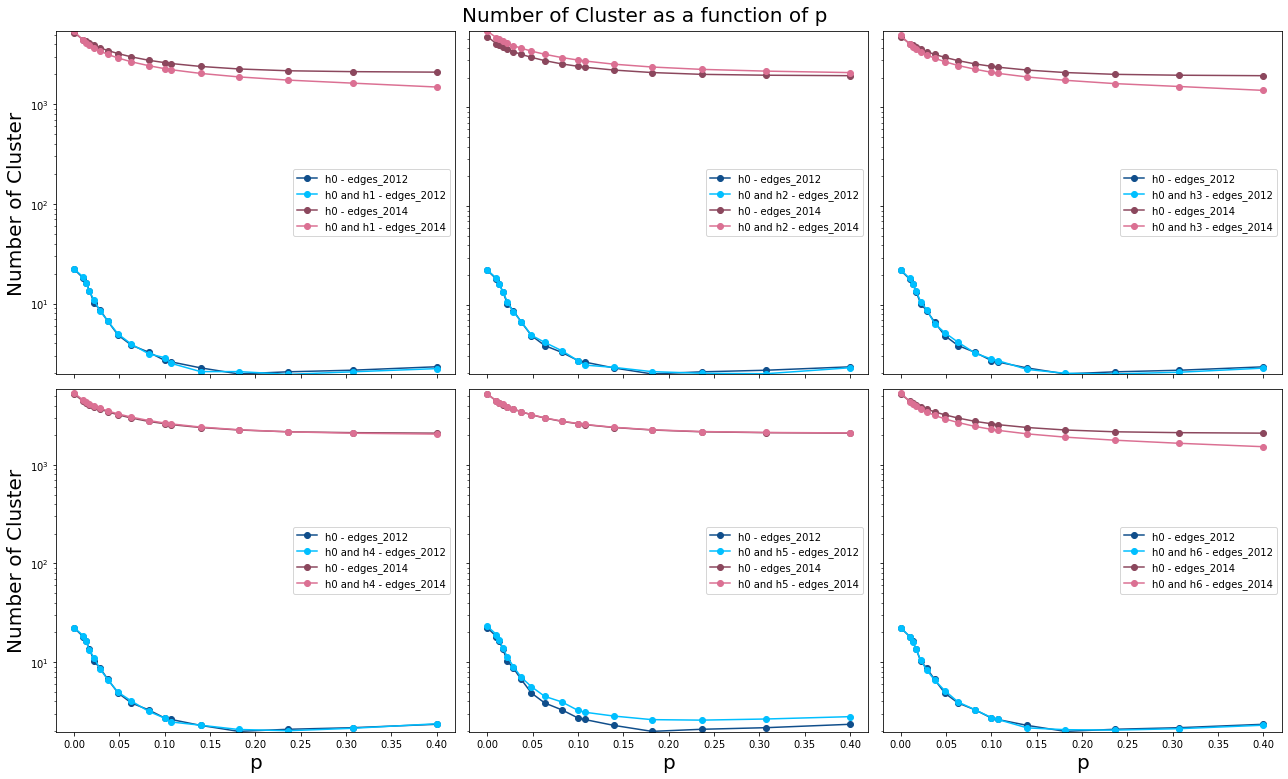

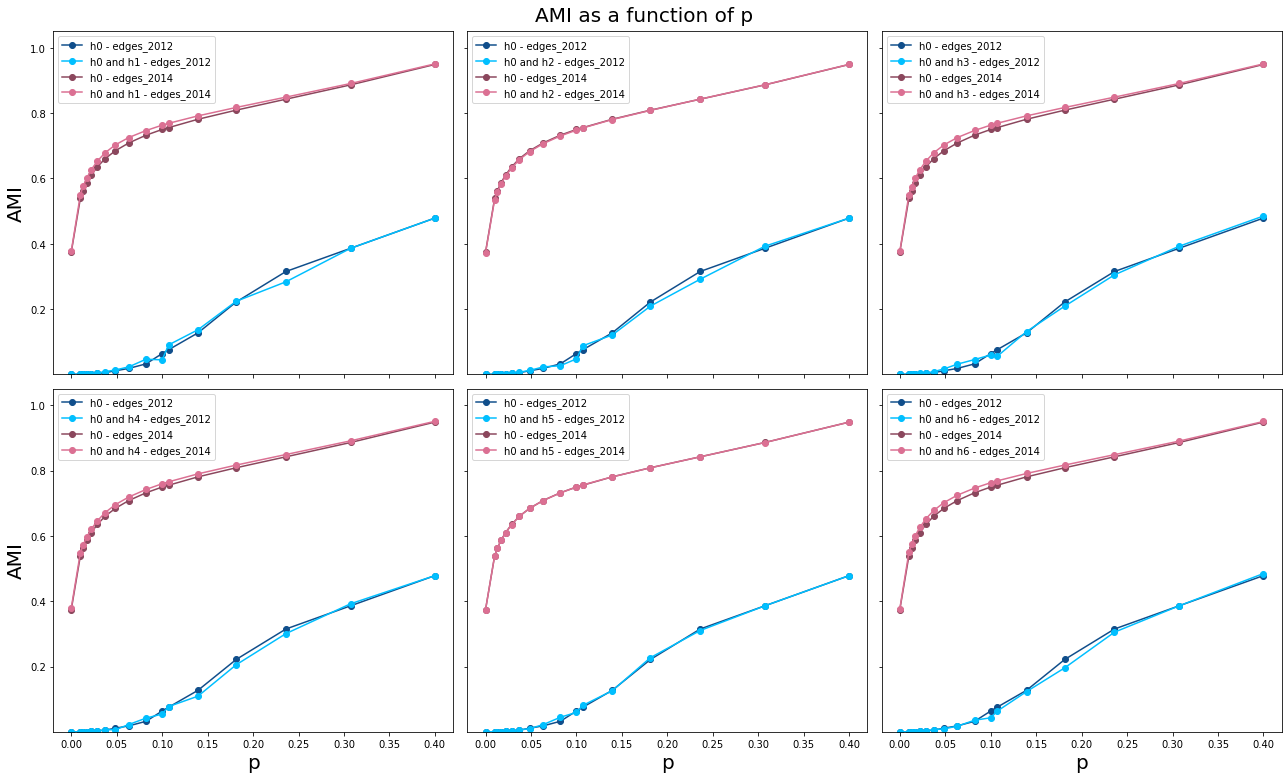

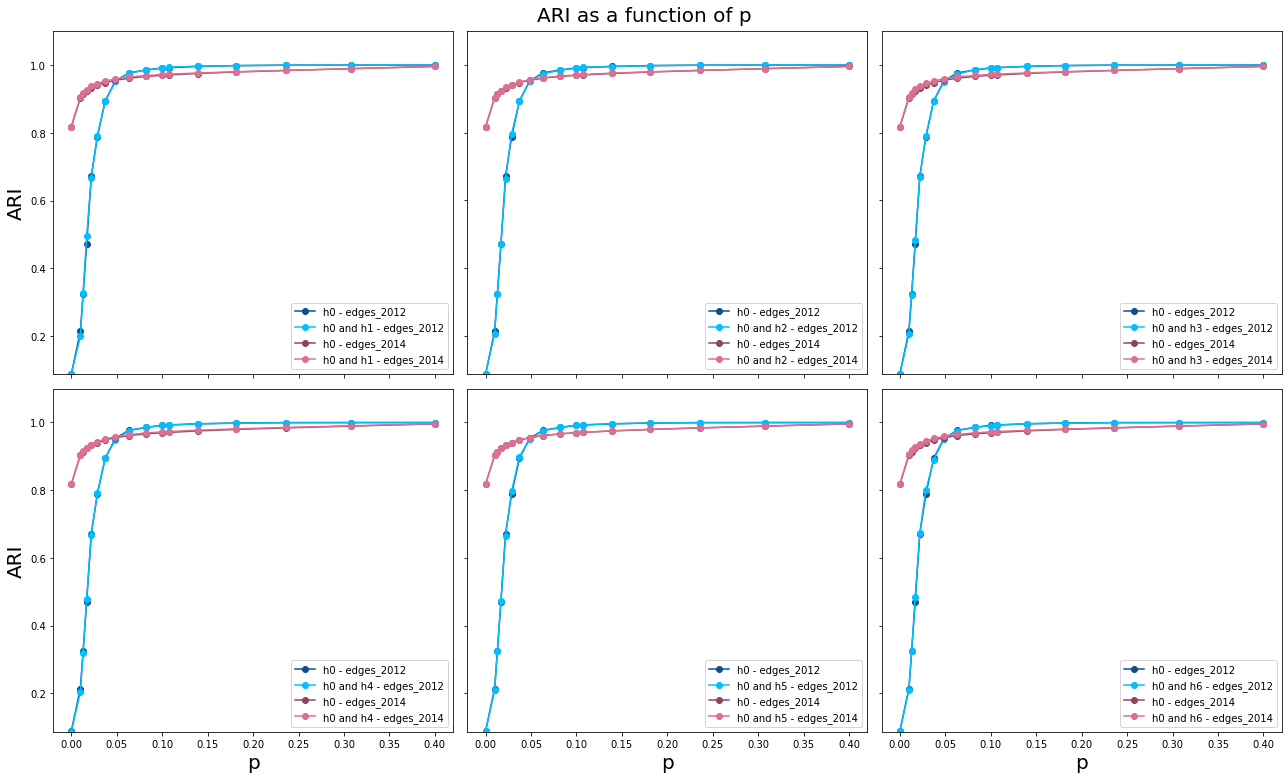

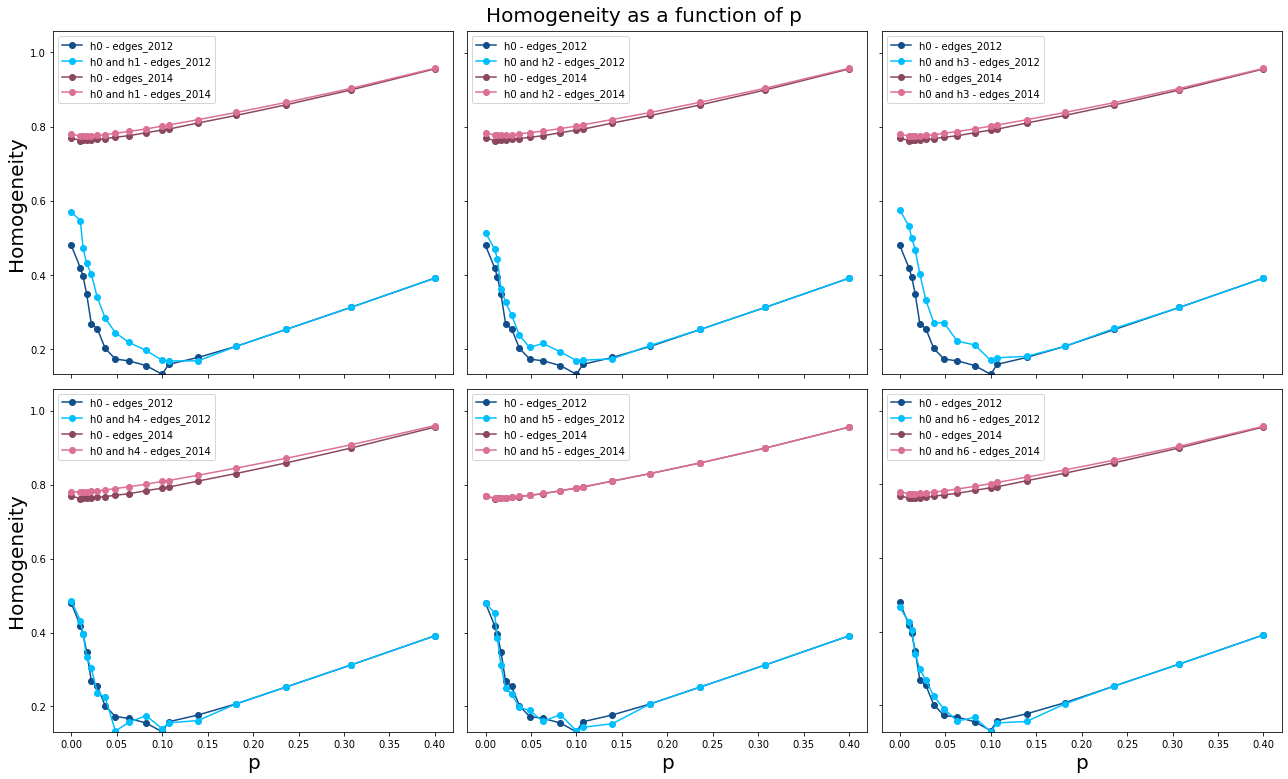

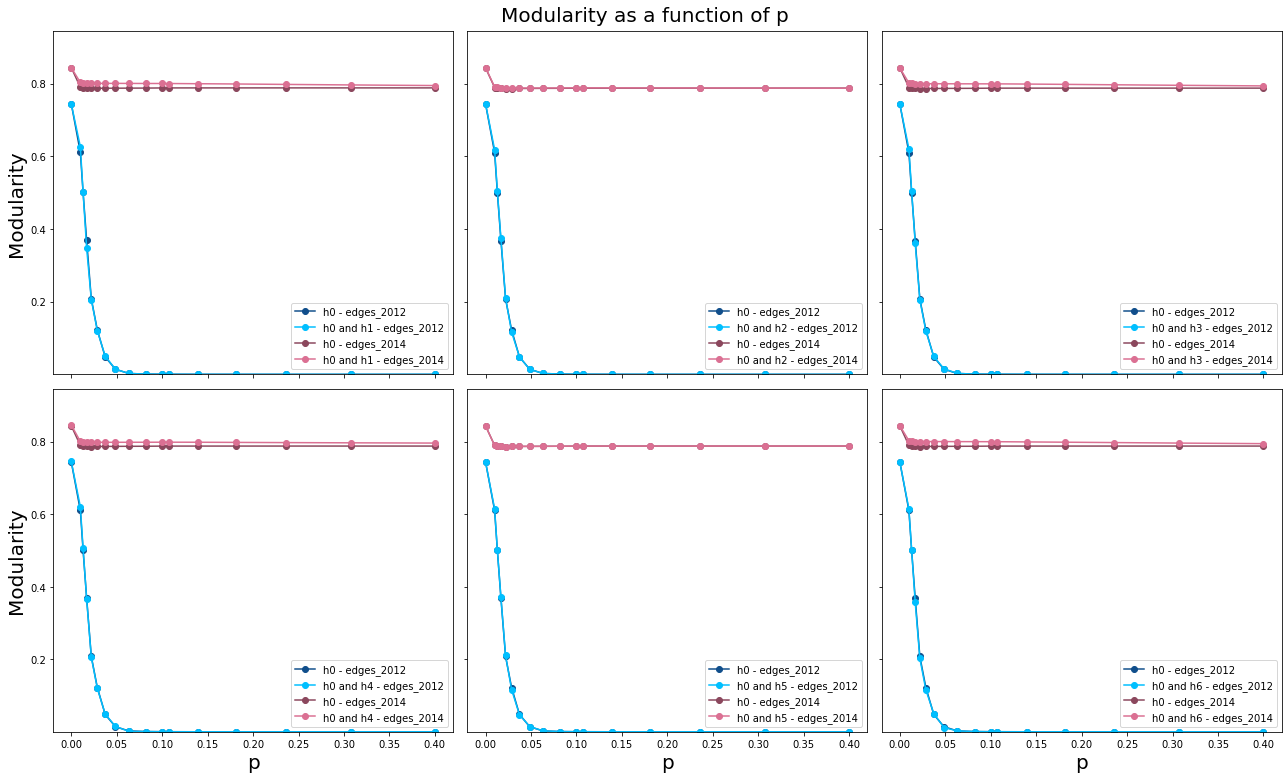

In [13]:

file_year = ['edges_2012', 'edges_2014']
metrics = ['n_clusters','ami', 'urs', 'homog', 'mod']
metric_names = ['Number of Cluster', 'AMI', 'ARI', 'Homogeneity', 'Modularity']

df_dict_list = []

# iteration over years for which we have got output files
for f in file_year:
    
    df_dict ={}
    
    for h in heuristics:
        
        path = Path("./data/res").iterdir()
        files = []
        
        for x in path:
            if h == 'h0':
                # get all file names corresponding to h0 and f
                if x.is_file() and f"$h0$" in x.stem and f in x.stem: files.append(x)
            else:
                # get all file names corresponding to the pair of heuristics h0 and h
                if x.is_file() and f"h0_{h}" in x.stem and f in x.stem: files.append(x)
        
        if h == 'h0':
            title = f"h0 - {f}"
        else:
            title = f"h0 and {h} - {f}"

        
        # dataframe of first file in files
        df = pd.read_csv(f"./{files[0]}")

        # iteration over number of files corresponding to heuristics h0 and h and input edge_data_year file (f)
        for i in range(len(files)-1):

            df_next = pd.read_csv(f"./{files[i+1]}")
            
            # sum of column of metrics across all output files
            for m in metrics:
                
                df[m] = df[m] + df_next[m]
                
        # mean of each metric column in df(which now has the sum of metrics over all files of pair h0 and h)
        for m in metrics:

            df[m] = df[m]/len(files)
            
        
            
        df_dict[title] = df
    
    df_dict_list.append(df_dict)
    

plotGraph(heuristics, df_dict_list, metrics, metric_names)

